In [1]:
!pip install tweepy
!pip install pymongo
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime



In [2]:
api_key = "1dSWQ7sR4VzVcx0GmLBZwLN7t" # <---- Add your API Key
api_secret = "ngma3SLArKBPgtTAu5RP88SwBpKPVZhUSwhAsFHP4Dw0c0zu56" # <---- Add your API Secret
access_token = "1089121501897342977-4t0Rv3crUu6kDTOInQKJfeQeX0WCtq" # <---- Add your access token
access_token_secret = "hpr7WwHndEwFhd68XjCsKpMLBkIGraAv5TRmUNU5QKGL3" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["thaiidolgirl"]["bnk48"]
col.count()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


203

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["BNK48",
            "Heavey Rotation",
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:23:12.951449
Tweets/Sec: 3.6
Tweets collected: 5000
Total tweets in collection: 5203


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [4]:
col.find_one()

{'_id': ObjectId('5f8291309686c39a12c1acc1'),
 'created_at': 'Sun Oct 11 04:59:23 +0000 2020',
 'id': 1315155008560660480,
 'id_str': '1315155008560660480',
 'text': 'RT @allaboutmusic48: —— 𝐓𝐎𝐃𝐀𝐘 🗓\n\n⏰ 13.00 น.\n📌 BNK48 Team NV 「Theater no Megami」 - Normal Stage\n🔴 iAM48 Application \n\n⏰ 17.00 น. \n📌 BNK48 Te…',
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1298273718397894656,
  'id_str': '1298273718397894656',
  'name': 'Lek',
  'screen_name': 'Lek47022120',
  'location': 'Bangkok, Thailand',
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1,
  'friends_count': 0,
  'listed_count': 0,
  'favourites_count': 2545,
  'statuses_count': 615,
  'created_at'

In [5]:

dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Sun Oct 11 04:59:23 +0000 2020,RT @allaboutmusic48: —— 𝐓𝐎𝐃𝐀𝐘 🗓\n\n⏰ 13.00 น.\...,@Lek47022120,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
1,Sun Oct 11 04:59:27 +0000 2020,RT @mobilebnk48home: วันนี้มีเธียเตอร์ Theater...,@esus80128934,"<a href=""http://twitter.com/download/android"" ...",und
2,Sun Oct 11 04:59:29 +0000 2020,RT @WeeBNK48FC: ในที่สุดก็มีแฟ้มแล้ว 🌝🎉\n\nCre...,@OnlyWee1,"<a href=""http://twitter.com/download/android"" ...",und
3,Sun Oct 11 04:59:32 +0000 2020,RT @CherprangFcTwo: [[Cher's Story]]\n\nมอนิ่ง...,@ploy_kynz25,"<a href=""http://twitter.com/download/android"" ...",und
4,Sun Oct 11 04:59:32 +0000 2020,คือแบบ มันเป็นโมเมนต์น่ารักที่ดูแล้วเขินอะ ☺️\...,@bluetinymonkey,"<a href=""http://twitter.com/download/iphone"" r...",th
...,...,...,...,...,...
5198,Wed Oct 14 03:24:51 +0000 2020,RT @MheeLoyLom: ไลฟ์เจนนิดกับฝ้ายแล้วการออกมาส...,@nudandnd,"<a href=""http://twitter.com/download/iphone"" r...",th
5199,Wed Oct 14 03:24:52 +0000 2020,RT @MheeLoyLom: ไลฟ์เจนนิดกับฝ้ายแล้วการออกมาส...,@kayxxx_w,"<a href=""http://twitter.com/download/iphone"" r...",th
5200,Wed Oct 14 03:24:52 +0000 2020,RT @_SUIKYO: @maydear_ น้องเปี่ยมbnk48ไม่โพสต์...,@wwrong27,"<a href=""http://twitter.com/download/iphone"" r...",th
5201,Wed Oct 14 03:24:52 +0000 2020,RT @PWRshido: ฝ : ยังบอกพี่ทรายอยู่เลยพี่ทรายห...,@phukwaanjeab,"<a href=""http://twitter.com/download/android"" ...",th


In [6]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,5136
1,หน,2150
2,อน,2131
3,ไลฟ,2089
4,เด,2085
5,เจนน,1976
6,bnk48,1628
7,ไม,1319
8,แต,1279
9,ดก,1261


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Echofon                   1
Twitter for Mac           1
BNK48 Hashtags            3
Tweetbot for iΟS          4
TweetDeck                 5
Twitter Web App         284
Twitter for iPad        349
Twitter for Android    2252
Twitter for iPhone     2304
Name: source, dtype: int64

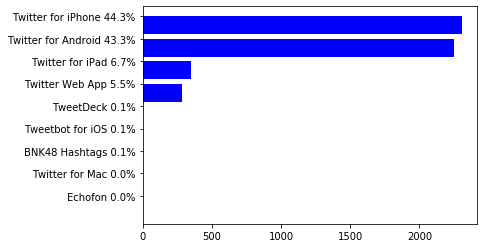

In [7]:

def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

ko        1
sv        1
in        1
nl        3
no        4
et        5
ja        6
en       41
und     148
th     4992
Name: lang, dtype: int64

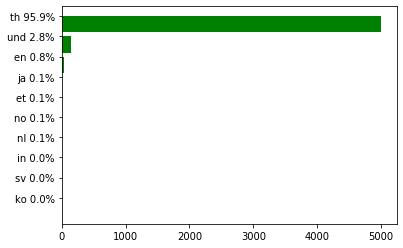

In [8]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [9]:

from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [10]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1315155008560660480,RT @allaboutmusic48: —— 𝐓𝐎𝐃𝐀𝐘 🗓\n\n⏰ 13.00 น.\...,en
11,1315155078060228609,RT @CherprangFcTwo: [[Cher's Story]]\n\n💚💚💚 \n...,en
22,1315155167260618754,cherprang in ponytail and pouting. MY DAY IS N...,en
40,1315155302262566916,"RT @x3end1: In the cookies of life, sisters ar...",en
41,1315155310462431232,RT @mukashi1911: [10.10.2020] - Heavy Rotation...,en
46,1315155349792407552,RT @hourlycherprang: cherprang in ponytail and...,en
94,1315155689963089921,RT @mukashi1911: [10.10.2020] - Heavy Rotation...,en
103,1315155729062322178,RT @sita_cgm48THFC: [Instagram] — #MusicBNK48 ...,en
130,1315155953025605633,RT @hourlycherprang: cherprang in ponytail and...,en
160,1315156316151672833,RT @hourlycherprang: hello sunday ☀️\n\n✩⡱ #Ch...,en


In [11]:
!pip install textblob
from  textblob import TextBlob


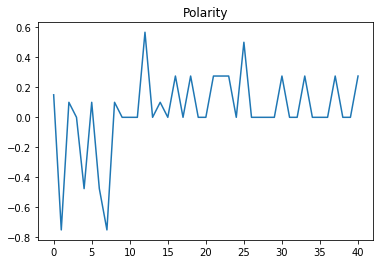

In [12]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

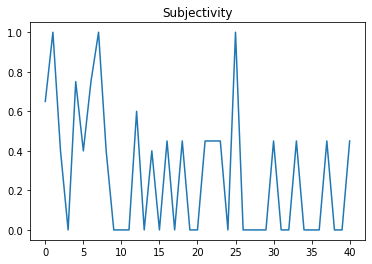

In [13]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [14]:
import statistics
statistics.mean(poltweet.polarity)

0.04004065040650406

In [15]:
import statistics
statistics.mean(poltweet.subjectivity)

0.2780487804878049